In [2]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json 

#Import API Key
from api_key import fbi_cde_key

ModuleNotFoundError: No module named 'api_key'

In [3]:
# Load the Data from Kento's API pull
file_path = "./Resources/state_id.csv"
state_id_df = pd.read_csv(file_path)
pd.DataFrame(state_id_df)
state_id_df.loc[:, ["State_ID"]].head()

,State_ID
0,AL
1,AK
2,AS
3,AZ
4,AR


In [4]:
state_id_list = state_id_df["State_ID"].tolist()
print(state_id_list)

['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FM', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MH', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PW', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY']


In [ ]:
for state_id in state_id_list:
    url = f"https://api.usa.gov/crime/fbi/cde/arrest/state/{state_id}/property_crime?from=2017&to=2021&API_KEY={fbi_cde_key}"
    print(url)

In [ ]:
data_list = []

for state_id in state_id_list:
    url = f"https://api.usa.gov/crime/fbi/cde/arrest/state/{state_id}/property_crime?from=2017&to=2021&API_KEY={fbi_cde_key}"
    response = requests.get(url).json()

    data = response["data"]
    for data_list_response in data:
        data_list_response ["state "] = state_id
        data_list.append(data_list_response)

In [ ]:
data_list

In [ ]:
json_data = json.dumps(data_list, indent=4)

file_path = "FBI_Data_Raw.json"

with open(file_path,'w') as json_file:
    json_file.write(json_data)

print(f"API response saved to {file_path}")

In [5]:
# To avoid polling the API again, we can pull the data from the saved JSON.
pull_json = "FBI_Data_Raw.json"

json_response_df = pd.read_json(pull_json)
json_response_df

,data_year,Motor Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Larceny - Theft,Vandalism,"Stolen Property: Buying, Receiving, Possessing",state
0,2017,877,104,2880,152,1109,2819,13959,1256,2280,AL
1,2018,994,110,2809,150,983,2611,14513,1234,2177,AL
2,2019,920,88,2198,140,846,2309,13555,1183,1881,AL
3,2020,20,3,65,7,34,56,435,29,46,AL
4,2021,320,24,696,4,195,431,2561,627,622,AL
...,...,...,...,...,...,...,...,...,...,...,...
251,2017,130,38,217,18,49,158,1995,493,94,WY
252,2018,128,19,243,6,36,127,1818,419,80,WY
253,2019,104,27,229,1,29,112,1562,467,55,WY
254,2020,149,18,211,2,19,97,1640,502,50,WY


In [6]:
# Clean the Dataframe
crime_df = json_response_df.rename(columns=
                              {"data_year": "Year",
                               "Motor Vehicle Theft": "Vehicle Theft",
                               "state ": "State",
                               "Stolen Property: Buying, Receiving, Possessing": "Dealing in Stolen Property"
                              })
crime_df


,Year,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Larceny - Theft,Vandalism,Dealing in Stolen Property,State
0,2017,877,104,2880,152,1109,2819,13959,1256,2280,AL
1,2018,994,110,2809,150,983,2611,14513,1234,2177,AL
2,2019,920,88,2198,140,846,2309,13555,1183,1881,AL
3,2020,20,3,65,7,34,56,435,29,46,AL
4,2021,320,24,696,4,195,431,2561,627,622,AL
...,...,...,...,...,...,...,...,...,...,...,...
251,2017,130,38,217,18,49,158,1995,493,94,WY
252,2018,128,19,243,6,36,127,1818,419,80,WY
253,2019,104,27,229,1,29,112,1562,467,55,WY
254,2020,149,18,211,2,19,97,1640,502,50,WY


In [7]:
crime_df_cleaned = crime_df[["Year", 
                        "State", 
                        "Larceny - Theft",
                        "Vehicle Theft", 
                        "Arson", 
                        "Burglary", 
                        "Embezzlement", 
                        "Forgery and Counterfeiting", 
                        "Fraud", 
                        "Vandalism",
                        "Dealing in Stolen Property"
                       ]]
crime_df_cleaned

,Year,State,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property
0,2017,AL,13959,877,104,2880,152,1109,2819,1256,2280
1,2018,AL,14513,994,110,2809,150,983,2611,1234,2177
2,2019,AL,13555,920,88,2198,140,846,2309,1183,1881
3,2020,AL,435,20,3,65,7,34,56,29,46
4,2021,AL,2561,320,24,696,4,195,431,627,622
...,...,...,...,...,...,...,...,...,...,...,...
251,2017,WY,1995,130,38,217,18,49,158,493,94
252,2018,WY,1818,128,19,243,6,36,127,419,80
253,2019,WY,1562,104,27,229,1,29,112,467,55
254,2020,WY,1640,149,18,211,2,19,97,502,50


In [11]:
census_path = "./Resources/census_data.csv"

census_df = pd.read_csv(census_path)
census_df.head()

,State,epop2017,epop2018,epop2019,epop2020
0,AL,4877989,4891628,4907965,4921532
1,AK,740983,736624,733603,731158
2,AZ,7048088,7164228,7291843,7421401
3,AR,3003855,3012161,3020985,3030522
4,CA,39337785,39437463,39437610,39368078


In [35]:
# Combine the Crime and Census Dataframes
crime_census_combined = crime_df_cleaned.merge(census_df,how="left", on=["State", "State"])
crime_census_combined

,Year,State,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,epop2017,epop2018,epop2019,epop2020
0,2017,AL,13959,877,104,2880,152,1109,2819,1256,2280,4877989.0,4891628.0,4907965.0,4921532.0
1,2018,AL,14513,994,110,2809,150,983,2611,1234,2177,4877989.0,4891628.0,4907965.0,4921532.0
2,2019,AL,13555,920,88,2198,140,846,2309,1183,1881,4877989.0,4891628.0,4907965.0,4921532.0
3,2020,AL,435,20,3,65,7,34,56,29,46,4877989.0,4891628.0,4907965.0,4921532.0
4,2021,AL,2561,320,24,696,4,195,431,627,622,4877989.0,4891628.0,4907965.0,4921532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2017,WY,1995,130,38,217,18,49,158,493,94,579994.0,579054.0,580116.0,582328.0
252,2018,WY,1818,128,19,243,6,36,127,419,80,579994.0,579054.0,580116.0,582328.0
253,2019,WY,1562,104,27,229,1,29,112,467,55,579994.0,579054.0,580116.0,582328.0
254,2020,WY,1640,149,18,211,2,19,97,502,50,579994.0,579054.0,580116.0,582328.0


In [36]:
# Add the crime columns together in each row to crete a "Total Arrests" column
crime_census_combined["Total Arrests"] = crime_census_combined["Larceny - Theft"] + crime_census_combined["Vehicle Theft"] + crime_census_combined["Arson"] + crime_census_combined["Burglary"] + crime_census_combined["Embezzlement"] + crime_census_combined["Forgery and Counterfeiting"] + crime_census_combined["Fraud"] + crime_census_combined["Vandalism"] + crime_census_combined["Dealing in Stolen Property"]
crime_census_combined

,Year,State,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,epop2017,epop2018,epop2019,epop2020,Total Arrests
0,2017,AL,13959,877,104,2880,152,1109,2819,1256,2280,4877989.0,4891628.0,4907965.0,4921532.0,25436
1,2018,AL,14513,994,110,2809,150,983,2611,1234,2177,4877989.0,4891628.0,4907965.0,4921532.0,25581
2,2019,AL,13555,920,88,2198,140,846,2309,1183,1881,4877989.0,4891628.0,4907965.0,4921532.0,23120
3,2020,AL,435,20,3,65,7,34,56,29,46,4877989.0,4891628.0,4907965.0,4921532.0,695
4,2021,AL,2561,320,24,696,4,195,431,627,622,4877989.0,4891628.0,4907965.0,4921532.0,5480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2017,WY,1995,130,38,217,18,49,158,493,94,579994.0,579054.0,580116.0,582328.0,3192
252,2018,WY,1818,128,19,243,6,36,127,419,80,579994.0,579054.0,580116.0,582328.0,2876
253,2019,WY,1562,104,27,229,1,29,112,467,55,579994.0,579054.0,580116.0,582328.0,2586
254,2020,WY,1640,149,18,211,2,19,97,502,50,579994.0,579054.0,580116.0,582328.0,2688


In [37]:
# Put Total Arrests near the front of the dataframe
combined_cleaned = crime_census_combined[["Year", 
                        "State", 
                        "Total Arrests",
                        "Larceny - Theft",
                        "Vehicle Theft", 
                        "Arson", 
                        "Burglary", 
                        "Embezzlement", 
                        "Forgery and Counterfeiting", 
                        "Fraud", 
                        "Vandalism",
                        "Dealing in Stolen Property",
                        "epop2017",
                        "epop2018",
                        "epop2019",
                        "epop2020"
                       ]]
combined_cleaned

,Year,State,Total Arrests,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,epop2017,epop2018,epop2019,epop2020
0,2017,AL,25436,13959,877,104,2880,152,1109,2819,1256,2280,4877989.0,4891628.0,4907965.0,4921532.0
1,2018,AL,25581,14513,994,110,2809,150,983,2611,1234,2177,4877989.0,4891628.0,4907965.0,4921532.0
2,2019,AL,23120,13555,920,88,2198,140,846,2309,1183,1881,4877989.0,4891628.0,4907965.0,4921532.0
3,2020,AL,695,435,20,3,65,7,34,56,29,46,4877989.0,4891628.0,4907965.0,4921532.0
4,2021,AL,5480,2561,320,24,696,4,195,431,627,622,4877989.0,4891628.0,4907965.0,4921532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2017,WY,3192,1995,130,38,217,18,49,158,493,94,579994.0,579054.0,580116.0,582328.0
252,2018,WY,2876,1818,128,19,243,6,36,127,419,80,579994.0,579054.0,580116.0,582328.0
253,2019,WY,2586,1562,104,27,229,1,29,112,467,55,579994.0,579054.0,580116.0,582328.0
254,2020,WY,2688,1640,149,18,211,2,19,97,502,50,579994.0,579054.0,580116.0,582328.0


In [ ]:
# For Laura: Normalize Create a new column with a calculated per-capita crime rate.

In [4]:
population_file = "./census_data.csv"


population_df = pd.read_csv(population_file)
population_df.head()



,State,Population
0,AL,4921532
1,AK,731158
2,AZ,7421401
3,AR,3030522
4,CA,39368078


In [25]:
crimes_file = "./fbi-crime-data-normalized.csv"

crimes_df = pd.read_csv(crimes_file)
crimes_df.head()

crimes_pop_df = crimes_df.merge(population_df, on="State")
crimes_pop_df.head()

# calculate per capita crime rate
crime_rate_per_capita = crimes_pop_df["Arrests"]/crimes_pop_df["Population"]
crimes_pop_df["Crime Rate Per Capita"] = crime_rate_per_capita 

crimes_pop_df.head()


,State,Year,Crime,Arrests,Population,Crime Rate Per Capita
0,AL,2017,Motor Vehicle Theft,877,4921532,0.000178
1,AL,2018,Motor Vehicle Theft,994,4921532,0.000202
2,AL,2019,Motor Vehicle Theft,920,4921532,0.000187
3,AL,2020,Motor Vehicle Theft,20,4921532,0.000004
4,AL,2021,Motor Vehicle Theft,320,4921532,0.000065


In [ ]:
file_one_df.to_csv("./output/fileOne.csv", index=False, header=True)


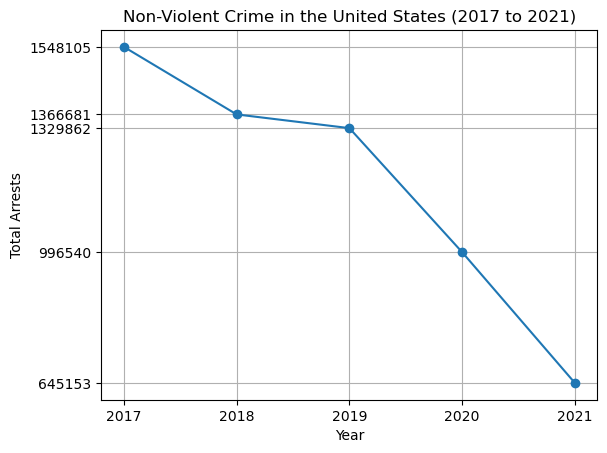

In [82]:
# Use the National Data to show the crime rate over time
# For Michelle:  We will need to redo this when we get the per-capita data from Laura

national_total = combined_cleaned.groupby("Year")["Total Arrests"].sum().reset_index()

plt.plot(national_total["Year"], national_total["Total Arrests"], marker="o")

plt.title("Non-Violent Crime in the United States (2017 to 2021)")
plt.xlabel("Year")
plt.ylabel("Total Arrests")

plt.yticks(national_total["Total Arrests"])
plt.xticks(national_total["Year"])
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.show()


In [26]:
# Isolate Crime Data by year for later graphs.
# 2017
crime_df_2017 = combined_cleaned[combined_cleaned["Year"] == 2017]
crime_df_2017.head()

,Year,State,Total Crime,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,epop2017,epop2018,epop2019,epop2020
0,2017,AL,25436,13959,877,104,2880,152,1109,2819,1256,2280,4877989.0,4891628.0,4907965.0,4921532.0
5,2017,AK,5213,2356,694,22,623,77,113,219,1004,105,740983.0,736624.0,733603.0,731158.0
10,2017,AZ,52895,30433,1735,232,4251,457,1219,2142,10974,1452,7048088.0,7164228.0,7291843.0,7421401.0
15,2017,AR,17981,9975,623,40,2138,60,859,918,1574,1794,3003855.0,3012161.0,3020985.0,3030522.0
20,2017,CA,153175,47080,19541,1573,38214,997,4449,6936,16962,17423,39337785.0,39437463.0,39437610.0,39368078.0


In [27]:
# 2018
crime_df_2018 = combined_cleaned[combined_cleaned["Year"] == 2018]
crime_df_2018.head()

,Year,State,Total Crime,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,epop2017,epop2018,epop2019,epop2020
1,2018,AL,25581,14513,994,110,2809,150,983,2611,1234,2177,4877989.0,4891628.0,4907965.0,4921532.0
6,2018,AK,5395,2392,726,43,602,54,154,201,1103,120,740983.0,736624.0,733603.0,731158.0
11,2018,AZ,49368,27123,1794,417,3993,854,1164,2183,10704,1136,7048088.0,7164228.0,7291843.0,7421401.0
16,2018,AR,19783,11560,652,69,2020,54,905,972,1669,1882,3003855.0,3012161.0,3020985.0,3030522.0
21,2018,CA,141270,42468,18020,1529,35230,921,4118,6105,16652,16227,39337785.0,39437463.0,39437610.0,39368078.0


In [28]:
# 2019
crime_df_2019 = combined_cleaned[combined_cleaned["Year"] == 2019]
crime_df_2019.head()

,Year,State,Total Crime,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,epop2017,epop2018,epop2019,epop2020
2,2019,AL,23120,13555,920,88,2198,140,846,2309,1183,1881,4877989.0,4891628.0,4907965.0,4921532.0
7,2019,AK,4507,1885,476,49,603,43,78,121,1161,91,740983.0,736624.0,733603.0,731158.0
12,2019,AZ,46165,26034,1570,180,3871,489,881,2188,9932,1020,7048088.0,7164228.0,7291843.0,7421401.0
17,2019,AR,19841,11541,619,65,1964,52,880,951,1908,1861,3003855.0,3012161.0,3020985.0,3030522.0
22,2019,CA,134707,40497,15240,1575,33741,988,3824,6863,16811,15168,39337785.0,39437463.0,39437610.0,39368078.0


In [31]:
# 2020
crime_df_2020 = combined_cleaned[combined_cleaned["Year"] == 2020]
crime_df_2020.head()

,Year,State,Total Crime,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,epop2017,epop2018,epop2019,epop2020
3,2020,AL,695,435,20,3,65,7,34,56,29,46,4877989.0,4891628.0,4907965.0,4921532.0
8,2020,AK,3812,1545,338,42,471,35,53,199,1063,66,740983.0,736624.0,733603.0,731158.0
13,2020,AZ,39037,21274,1684,218,3542,345,610,1467,8874,1023,7048088.0,7164228.0,7291843.0,7421401.0
18,2020,AR,15387,8608,553,62,1702,29,618,625,1518,1672,3003855.0,3012161.0,3020985.0,3030522.0
23,2020,CA,113589,28350,16369,2051,26220,680,2753,5042,17493,14631,39337785.0,39437463.0,39437610.0,39368078.0


In [30]:
# 2021
crime_df_2021 = combined_cleaned[combined_cleaned["Year"] == 2021]
crime_df_2021.head()

,Year,State,Total Crime,Larceny - Theft,Vehicle Theft,Arson,Burglary,Embezzlement,Forgery and Counterfeiting,Fraud,Vandalism,Dealing in Stolen Property,epop2017,epop2018,epop2019,epop2020
4,2021,AL,5480,2561,320,24,696,4,195,431,627,622,4877989.0,4891628.0,4907965.0,4921532.0
9,2021,AK,972,349,96,13,151,3,7,19,323,11,740983.0,736624.0,733603.0,731158.0
14,2021,AZ,14028,7621,697,101,1153,54,194,609,3285,314,7048088.0,7164228.0,7291843.0,7421401.0
19,2021,AR,13701,6952,659,68,1651,26,495,502,1685,1663,3003855.0,3012161.0,3020985.0,3030522.0
24,2021,CA,7060,1981,823,139,910,22,162,451,1354,1218,39337785.0,39437463.0,39437610.0,39368078.0


In [ ]:
# Combine the Dataframes to show Population per State with Crimes per year
response_df_2017_combined = response_df_2017.merge(census_df,how="left", on=["State", "State"])
response_df_2017_combined